Import all required modules/packages

In [ ]:
#through out we have used univairate and bivariate in our analysis, please look through each properly

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import missingno as mano
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
pd.set_option('display.max_rows', 50)


In [4]:
raw=pd.read_csv("structured_songs.csv", low_memory=False)
raw.shape
display(raw)

,id,song_name,artist_name,playlist_name,genre,duration_ms,time_signature,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2Vc6NJ9PW9gD9q343XFRKx,Mercury: Retrograde,Mercury: Retrograde,NaN,Dark Trap,124539,4,0.831,0.814,2,-7.364,1.0,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
1,7pgJBLVz5VmnL7uGHmRj6p,Pathology,Ghostemane,NaN,Dark Trap,224427,4,0.719,0.493,8,-7.230,1.0,0.0794,0.401000,0.000000,0.1180,0.1240,115.080
2,0vSWgAlfpye0WCGeNmuNhy,Symbiote,Pathology,NaN,Dark Trap,98821,4,0.850,NaN,5,-4.783,1.0,0.0623,0.013800,0.000004,0.3720,0.0391,218.050
3,0VSXnJqQkwuH2ei1nOQ1nu,ProductOfDrugs (Prod. The Virus and Antidote),Don Kenobi,NaN,Dark Trap,123661,3,0.476,NaN,0,-4.710,1.0,0.1030,0.023700,0.000000,0.1140,0.1750,186.948
4,4jCeguq9rMTlbMmPHuO7S3,Venom,Symbiote,NaN,Dark Trap,123298,4,0.798,NaN,2,-7.668,1.0,0.2930,NaN,0.000000,0.1660,0.5910,147.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42293,46bXU7Sgj7104ZoXxzz9tM,NaN,NaN,Euphoric Hardstyle,hardstyle,269208,4,0.528,0.693,4,-5.148,1.0,0.0304,0.031500,0.000345,0.1210,0.3940,150.013
42294,0he2ViGMUO3ajKTxLOfWVT,NaN,NaN,Greatest Hardstyle Playlist,hardstyr,210112,4,0.517,0.768,0,-7.922,0.0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928
42295,72DAt9Lbpy9EUS29OzQLob,NaN,NaN,Best of Hardstyle 2020,hardstyle,234823,4,0.361,0.821,8,-3.102,1.0,0.0505,0.026000,0.000242,0.3850,0.1240,154.935
42296,6HXgExFVuE1c3cq9QjFCcU,NaN,NaN,Euphoric Hardstyle,hardstyle,323200,4,0.477,0.921,6,-4.777,0.0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042


In [147]:
raw.isnull().sum()


id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  19
duration_ms             0
time_signature          0
danceability           11
energy                 19
key                     0
loudness                4
mode                    2
speechiness            12
acousticness           11
instrumentalness        1
liveness                0
valence                 0
tempo                  11
dtype: int64

```python
# Filling Missing Values as seen appropriate
```

In [148]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  19
duration_ms             0
time_signature          0
danceability           11
energy                 19
key                     0
loudness                4
mode                    2
speechiness            12
acousticness           11
instrumentalness        1
liveness                0
valence                 0
tempo                  11
dtype: int64

<AxesSubplot:>

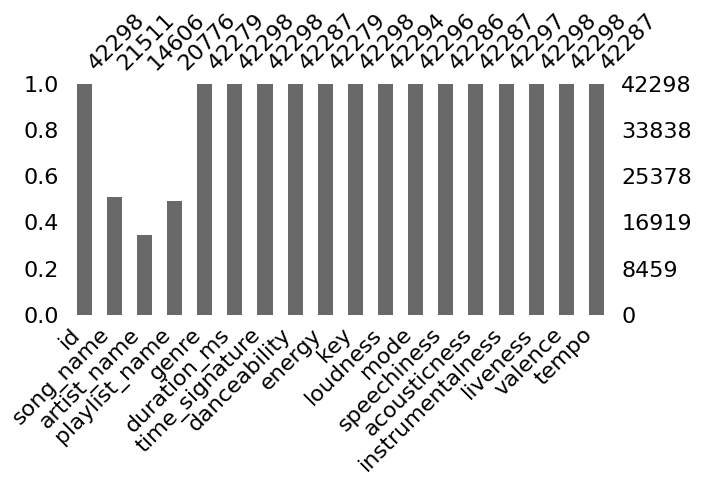

In [149]:
mano.bar(raw,  figsize=(7,3))
#most are seen in last two, rest have very less frequency of missing vlaues.

<AxesSubplot:>

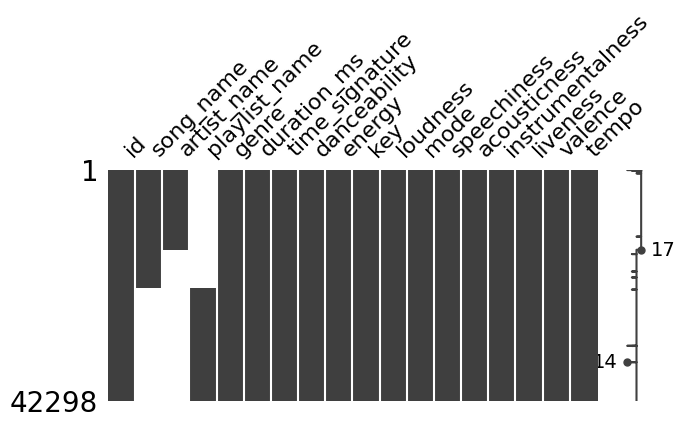

In [150]:
# visualize the location of the missingness of data using mano.matrix
mano.matrix(raw, figsize=(7,3))
#we can see that song_name and title have a very same missing pattern, where there is no song name, there is title

<AxesSubplot:>

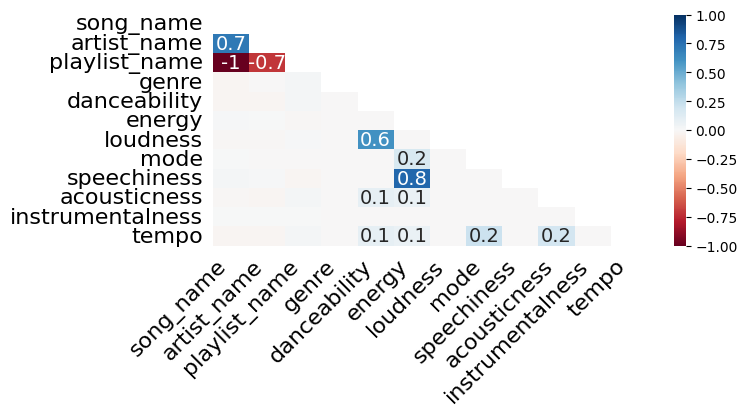

In [151]:
mano.heatmap(raw, figsize=(7,3))
#not showing the others because some float columns have been read in as object columns eg energy, mode
#some columns also very clearly have the exact same data under different column names

<AxesSubplot:>

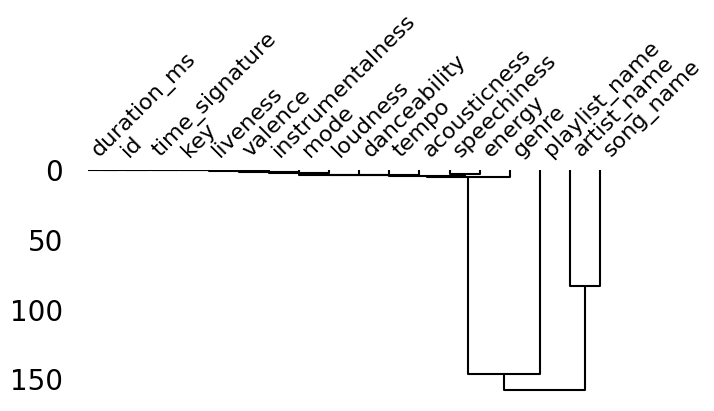

In [152]:
mano.dendrogram(raw,  figsize=(7,3))

the starting have striaght lines showing no missng values: liveness, key, valence, type, analysis_url
the rest we can see the extent of corelations, speechiness and energy have corelations

Filling Loudness Using Imputation

<AxesSubplot:>

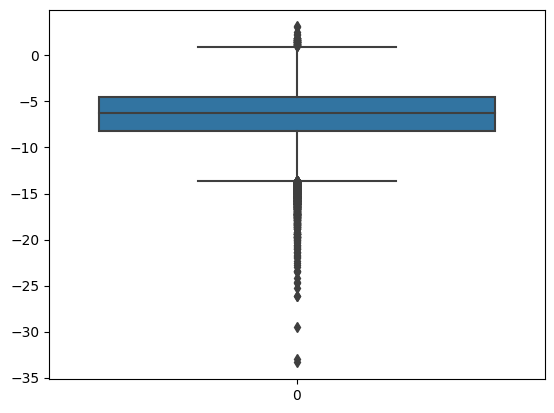

In [153]:
sns.boxplot(raw['loudness'])
#we have dropped the extreme outlier, and now we can see that most of the data is concentrated at one peak. 
#this median will be used to calcuate the misisng values and since very low missing vlaues, it would not be a problem

In [154]:
#filling in using median imputation
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with "median" strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the loudness column
imputer.fit(raw[['loudness']])

# Transform the loudness column, filling in missing values with the median
raw['loudness'] = imputer.transform(raw[['loudness']])


In [155]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  19
duration_ms             0
time_signature          0
danceability           11
energy                 19
key                     0
loudness                0
mode                    2
speechiness            12
acousticness           11
instrumentalness        1
liveness                0
valence                 0
tempo                  11
dtype: int64

Filling Danceability using Linear Regression


In [156]:
#in general higher danceability mostly relates to high loudness
#This code finds the missing danceability values, splits the data into two sets (one with missing danceability values and one with complete data), 
#fits a linear regression model on the complete data, and predicts the missing danceability values from the loudness values using the trained model.
from sklearn.linear_model import LinearRegression

# Load the data from CSV file
data = raw

# Extract the danceability and loudness columns from the data
danceability = data['danceability']
loudness = data['loudness']

# Find the missing danceability values
missing_danceability = danceability.isnull()

# Split the data into two sets: one with missing danceability values and one with complete data
X_complete = loudness[~missing_danceability].values.reshape(-1, 1)
y_complete = danceability[~missing_danceability].values.reshape(-1, 1)
X_missing = loudness[missing_danceability].values.reshape(-1, 1)

# Fit a linear regression model on the complete data
reg = LinearRegression()
reg.fit(X_complete, y_complete)

# Predict the missing danceability values from the loudness values using the trained model
y_missing = reg.predict(X_missing)

# Fill in the missing danceability values with the predicted values
danceability[missing_danceability] = y_missing.flatten()



C:\Users\Dell\AppData\Local\Temp\ipykernel_17096\2550273764.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danceability[missing_danceability] = y_missing.flatten()


In [157]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  19
duration_ms             0
time_signature          0
danceability            0
energy                 19
key                     0
loudness                0
mode                    2
speechiness            12
acousticness           11
instrumentalness        1
liveness                0
valence                 0
tempo                  11
dtype: int64

Filling Energy - Actually, Not yet, Let's Fill Something Else Up First

<AxesSubplot:xlabel='energy', ylabel='speechiness'>

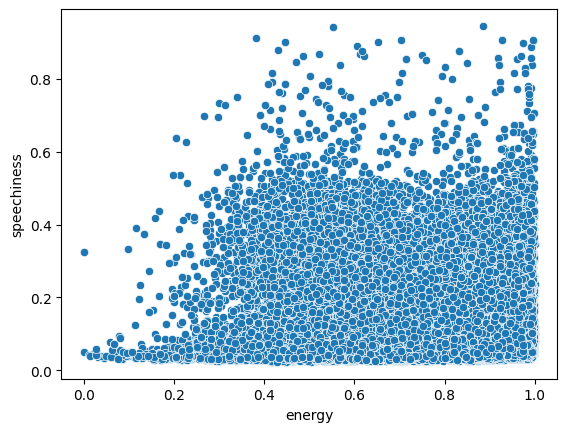

In [158]:
sns.scatterplot(data=raw, x="energy", y="speechiness")
#since highly corelated we check if it is valuable info for us

C:\Users\Dell\AppData\Local\Temp\ipykernel_17096\1028142556.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw['energy'])


Skewness: -0.738147
Kurtosis: -0.199257


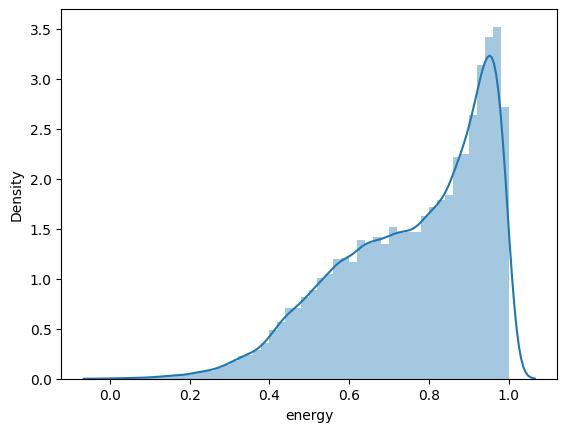

In [159]:
sns.distplot(raw['energy'])
print("Skewness: %f" % raw['energy'].skew())
print("Kurtosis: %f" % raw['energy'].kurt())

<AxesSubplot:>

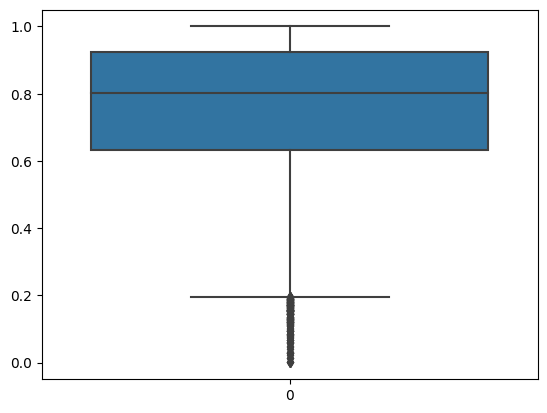

In [160]:
sns.boxplot(raw['energy'])

In [161]:
#we can see that the right lower quadrant is majory filled, that shows that for upper half of energy, there is lower half of speechiness
#which suggests that higher enery level songs mostly have lower speechiness. this shows negative corelation
#we will be filling energy using speechiness as predicotr in our regression model
#for that we will first fill speechiness


Filling Acousticness Using KNN


C:\Users\Dell\AppData\Local\Temp\ipykernel_17096\3707864043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw['acousticness'])


Skewness: -0.738147
Kurtosis: -0.199257


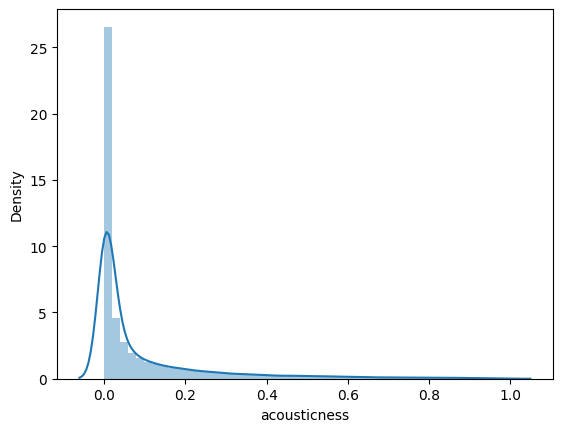

In [162]:
sns.distplot(raw['acousticness'])
print("Skewness: %f" % raw['energy'].skew())
print("Kurtosis: %f" % raw['energy'].kurt())

In [163]:
#in acousticness we can see that there are a very small value of missing values
#moreover the dsturbtion shows that within the column most of the values are at a similar peak, and has some outliers hence simialr to surrounding data
#there is low correaltion with other variabls hence most methods can be ineefecient
#MICE is a good alternative, but since only 13 missing values, it will be computatinally ineffecient.
# Compute the standard deviation of a column
std_dev = raw['acousticness'].std()

# Print the standard deviation
print(f"Standard deviation of column 'column_name': {std_dev}")
#SD is very low, hence KNN is going to be used to fill for column acousticness

Standard deviation of column 'column_name': 0.17083715304419778


In [164]:
from sklearn.impute import KNNImputer


# Create a KNN imputer object with k=3
imputer = KNNImputer(n_neighbors=3)

# Fit the imputer on the data and transform the missing values
raw['acousticness'] = imputer.fit_transform(raw[['acousticness']])



In [165]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  19
duration_ms             0
time_signature          0
danceability            0
energy                 19
key                     0
loudness                0
mode                    2
speechiness            12
acousticness            0
instrumentalness        1
liveness                0
valence                 0
tempo                  11
dtype: int64

Filling Instrumentalness using Median

0.2830472054218976
0.00594


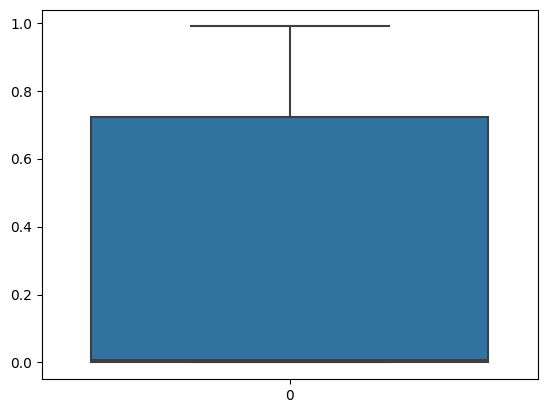

In [166]:
#since we only have one missing value in instrumentalness, we will first try to fill it
sns.boxplot(raw['instrumentalness'])
print(raw['instrumentalness'].mean())
print(raw['instrumentalness'].median())
#we can see that our median is very low, and is not justiying well for the 50% of data, that is interquartile range
#mean is catering to all values including outliers

<AxesSubplot:>

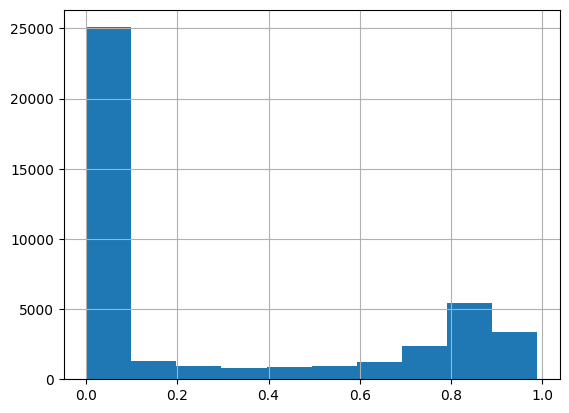

In [167]:
raw['instrumentalness'].hist()
#we can see that most of the data is at the peak
#this is a postively skewed distributtion, hence median will be safe way to fill in here

In [168]:
# Find the median of the column
median = raw['instrumentalness'].median()

# Fill in the missing value with the median
raw['instrumentalness'] = raw['instrumentalness'].fillna(median)


<AxesSubplot:xlabel='instrumentalness', ylabel='speechiness'>

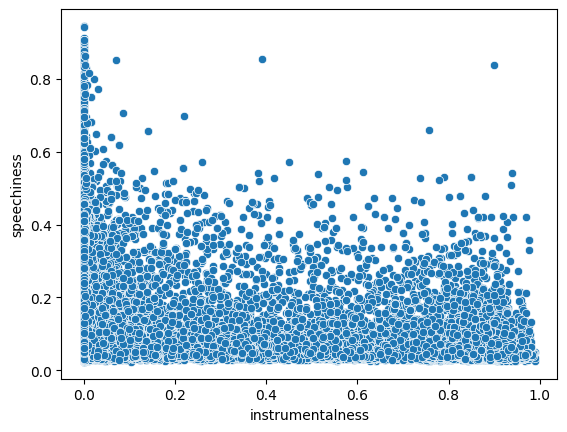

In [169]:
#our general understanding suggests that more instruments mean low speech, we check this with our data using scatter plot
#corelation matrix does not help us, so we use scatter plot
sns.scatterplot(data=raw, x="instrumentalness", y="speechiness")
#here we can see that as instumentalness increases, speachiness drops alot.


In [170]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  19
duration_ms             0
time_signature          0
danceability            0
energy                 19
key                     0
loudness                0
mode                    2
speechiness            12
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                  11
dtype: int64

Filling Speechiness using Instrumentalness

C:\Users\Dell\AppData\Local\Temp\ipykernel_17096\1962442847.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = raw.corr()


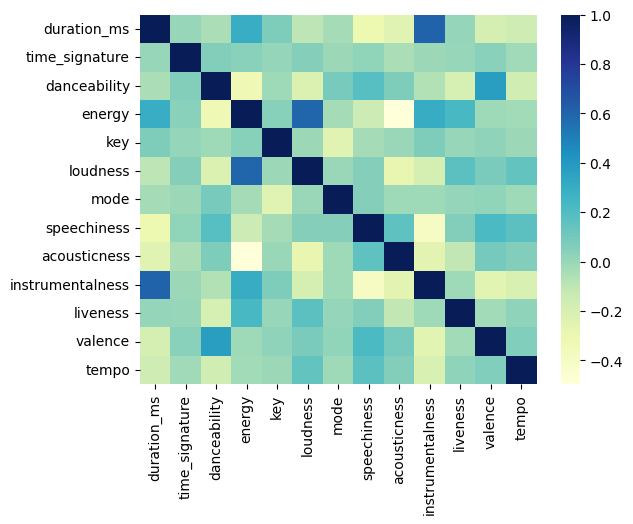

In [171]:
#we will be filling for speachiness using intrumentalness
#the missing values of instumentalness and speechiness is non existent, so we check if normal vlaues have a relation
# Create a correlation matrix
corr = raw.corr()

# Create a heatmap using seaborn
sns.heatmap(corr, cmap="YlGnBu")

# Show the plot
plt.show()

In [172]:
from sklearn.linear_model import LinearRegression

data=raw

# Subset the data where speechiness is not null
subset = data[data['speechiness'].notnull()]

# Fit a linear regression model to predict speechiness from instrumentalness
model = LinearRegression()
model.fit(subset[['instrumentalness']], subset['speechiness'])

# Use the model to predict missing speechiness values where speechiness is null
data.loc[data['speechiness'].isnull(), 'speechiness'] = model.predict(data[data['speechiness'].isnull()][['instrumentalness']])



In [173]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  19
duration_ms             0
time_signature          0
danceability            0
energy                 19
key                     0
loudness                0
mode                    2
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                  11
dtype: int64

Filling Energy Now Using Speechiness

In [174]:
from sklearn.linear_model import LinearRegression

# Subset the data where speechiness is not null
subset = data[data['energy'].notnull()]

# Fit a linear regression model to predict speechiness from instrumentalness
model = LinearRegression()
model.fit(subset[['speechiness']], subset['energy'])

# Use the model to predict missing speechiness values where speechiness is null
data.loc[data['energy'].isnull(), 'energy'] = model.predict(data[data['energy'].isnull()][['speechiness']])


In [175]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  19
duration_ms             0
time_signature          0
danceability            0
energy                  0
key                     0
loudness                0
mode                    2
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                  11
dtype: int64

Filling Tempo

In [176]:
#tempo has no correlations we use anova to see if it has any relation with non numeric columns
#our null hypthesis is that there is is no significant relationship between the two variables
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the ANOVA model formula
formula = 'tempo ~ C(genre) + C(mode)'

# Fit the model and perform the ANOVA test
model = ols(formula, data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)




                sum_sq       df           F   PR(>F)
C(genre)  7.242585e+06     20.0  912.530904  0.00000
C(mode)   1.097516e+01      1.0    0.027656  0.86792
Residual  1.676453e+07  42245.0         NaN      NaN


220.29
57.967


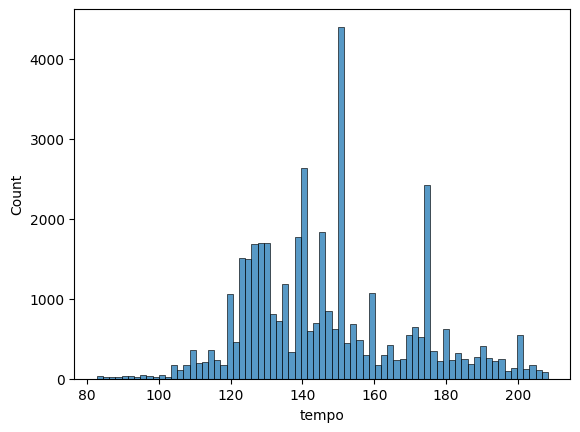

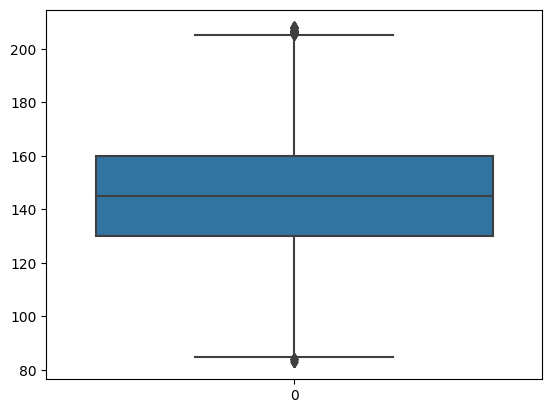

In [177]:
#since our p values are greater than 0.05, our null hypothesis is true
#we look at tempos distubtion and see if we can apply any other method on it
max_value = raw['tempo'].max() # get the max value
print(max_value)
min = raw['tempo'].min() # get the max value
print(min)
#since many outliers, we check for distuubtution without outliers
Q1 = raw['tempo'].quantile(0.25)
Q3 = raw['tempo'].quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = raw[(raw['tempo'] > (Q1 - 1.5 * IQR)) & (raw['tempo'] < (Q3 + 1.5 * IQR))]
sns.histplot(data_no_outliers['tempo'], kde=False)
plt.show()
sns.boxplot(data_no_outliers['tempo'])
plt.show()

In [178]:
#we can see to a great extnet tempo is normaised, and in a certian range, hence we fill it in using median
# Fill in the missing value with the median
raw['tempo'] = raw['tempo'].fillna(median)


In [179]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  19
duration_ms             0
time_signature          0
danceability            0
energy                  0
key                     0
loudness                0
mode                    2
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
dtype: int64

Filling Genre using Cluster Analysis

In [180]:
unique_values = raw['genre'].value_counts()
print(unique_values)


Underground Rap    5873
Dark Trap          4564
Hiphop             3028
trance             2999
trap               2986
techhouse          2974
dnb                2966
psytrance          2960
techno             2956
hardstyle          2935
RnB                2099
Trap Metal         1956
Rap                1836
Emo                1680
Pop                 461
Rax                   1
psyaf                 1
Has                   1
Underground Rp        1
Underground           1
hardstyr              1
Name: genre, dtype: int64


In [181]:
#we will be seeing if there is any significant association between 'genre' and the numeric columns.
#null hypothesis that there is no association between two categorical variables. using chi-test we see
import pandas as pd
from scipy.stats import chi2_contingency

# Load the data with missing values in the 'genre' column
data = raw

# Create a contingency table with 'genre' as the rows and the three numeric columns as the columns
cont_table = pd.crosstab(index=data['genre'].fillna('Missing'), 
                         columns=[data['energy'].fillna(0)>0, 
                                  data['energy'].fillna(0)==0, 
                                  data['danceability'].fillna(0)>0, 
                                  data['danceability'].fillna(0)==0, 
                                  data['acousticness'].fillna(0)>0, 
                                  data['acousticness'].fillna(0)==0], 
                         rownames=['Genre'], 
                         colnames=['Energy>0', 'Energy=0', 
                                   'Danceability>0', 'Danceability=0', 
                                   'Acousticness>0', 'Acousticness=0'], 
                         dropna=False)

# Perform the chi-square test of independence
chi2, p_val, dof, exp_freq = chi2_contingency(cont_table)

# Print the results
print('Chi-square test results:')
print(f'Chi-square statistic = {chi2:.2f}')
print(f'p-value = {p_val:.4f}')
print(f'degrees of freedom = {dof}')

Chi-square test results:
Chi-square statistic = 0.00
p-value = 1.0000
degrees of freedom = 0


In [22]:
#the results show that there is no relationship between genre and other numeric columns
#since pvalue>0.05, no relation
#if we look at our sheet, there is a pattern, and between a number of occurnaces of same genre, there are some misisng values
#9 missing in between 4567 of Dark trap,
#10 missing in between 1800+ of rap
#since these data are missing in simialr clusters, we will fill on assumption that same pattern is ocntinuting
#we have identified two clusters, we fill accoridngly
data=raw

# Identify clusters of missingness in the 'genre' column
clusters = np.where(data['genre'].isnull(), 1, 0).cumsum()

# Fill in missing values in the first cluster with 'Dark Trap'
data.loc[clusters == 1, 'genre'] = 'Dark Trap'

# Fill in missing values in the second cluster with 'Rap'
data.loc[clusters == 2, 'genre'] = 'Rap'

In [23]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                   0
duration_ms             0
time_signature          0
danceability           11
energy                 19
key                     0
loudness                4
mode                    2
speechiness            12
acousticness           11
instrumentalness        1
liveness                0
valence                 0
tempo                  11
dtype: int64

Filling Mode using Mode

In [184]:
#laslt since mode only has 2, we will be adding mising with mode, because for so less missing values, it should not matter
# Fill in missing values in the 'genre' column with the mode
raw['mode'] = raw['mode'].fillna(raw['mode'].mode()[0])



In [185]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  17
duration_ms             0
time_signature          0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
dtype: int64

In [186]:
raw.shape

(42298, 18)

In [187]:
raw.to_csv('clean_songs.csv', index=False)

In [ ]:
#using the three columns that we saw were related, that is ennergy was with speehciness,and speechiness with insturmentalneess
#we apply cluster analysis
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
data = raw.dropna()

# Select the numeric columns for clustering
columns = ['energy', 'speechiness','instrumentalness']
X = data[columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform cluster analysis
n_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the data
data['cluster'] = kmeans.labels_

# Print the number of samples in each cluster
print(data['cluster'].value_counts())

#using this we can see that differnet clusters have different amount of samples
#0th cluster has 3rd msot
# #This output can be useful for understanding the distribution of samples across the different clusters and for interpreting the results of the cluster analysis. 
# In this case, it appears that there are five clusters (labeled 0, 1, 2, 3, and 4). The output indicates that cluster 1 has the largest number of samples (13051), followed by cluster 4 with 11706 samples, then cluster 0 with 8053 samples, cluster 3 with 4807 samples, and finally cluster 2 with 4685 samples.

Filling Misisng Song Names using Spotify's API

In [188]:
#this will be using the uri, to update missing songs, it requires client id and secret which can not be shared.
#the output is not filled in the excel sheet, because the spotify APIs basic version has requests limit, and that was crossed, and to fill all we 
#will be reuqring an exrtension in quota which has professional pre req. We have talked to Sir he said it is alright since we have around 20k+ missing vlaues for songs here
#this is simply using the Spotify API to go and get the song name for the corresponding URI, and filling it inthe song_name column
from flask import *
import json, time

app = Flask(__name__)
songs=raw
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Authenticate with Spotify
client_id = 'client_id'
client_secret = 'client_secret'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

@app.route("/")
def index():
    return "update misisng songs!"


# Define your API endpoint
@app.route('/update_missing_song_names')
def update_missing_song_names():
    missing_songs = songs[songs['song_name'].isnull()]

    for index, row in missing_songs.iterrows():
        uri = row['uri']
        print(uri)
        song_name = ''

        # Retrieve the song information
        track = sp.track(uri)
        if track:
            song_name = track['name']

        # Save the song name in the missing value location
        songs.at[index, 'song_name'] = song_name
        # print(songs.at[index, 'song_name'])
        
    # Write the updated data to a new CSV file
    return 'Missing song names updated'

if __name__ == '__main__':
    app.run(port=8000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit


Save To CSV - we now have a clean file for Songs

In [ ]:
raw.to_csv('clean_songs.csv', index=False)